In [7]:
import pandas as pd
import re
#data = pd.read_csv(r"C:\Users\Dima\Downloads\Right neihbours.csv")
#data=[data["Combo"][i] for i in range(len(data))]
#df = pd.read_csv(r"C:\Users\Dima\Downloads\Right neihbours.csv")

#indicies = [i for i in range(len(df)) if df["result"][i]==1]
#data = [df['Combo'][i] for i in indicies]

data = pd.read_csv(r"words_set_short.csv")
data = [data["0"][i] for i in range(len(data))]


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(data)


In [32]:
#print(vectorizer.get_feature_names())
#print(X.shape)

In [10]:
print(X[0,])

  (0, 576)	0.5858504171127933
  (0, 1545)	0.8104192055774382


In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

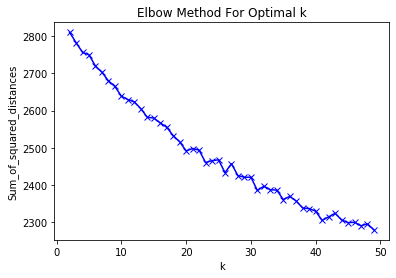

In [13]:
Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
true_k = 70
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cl=pd.DataFrame(list(labels),columns=['cluster'])
print(cl.sort_values(by=['cluster']))


      cluster
48          0
2708        0
2616        0
2709        0
2706        0
...       ...
2198       69
2202       69
934        69
2204       69
2203       69

[2864 rows x 1 columns]


Cluster: 0


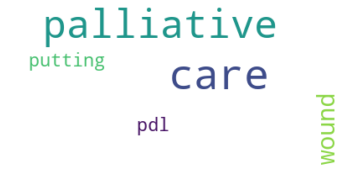

Cluster: 1


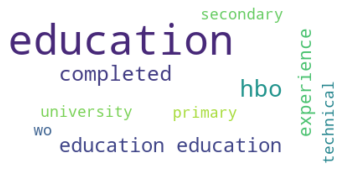

Cluster: 2


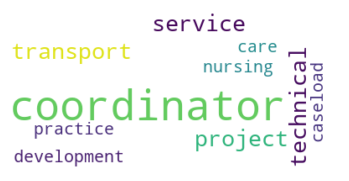

Cluster: 3


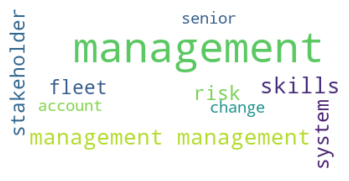

Cluster: 4


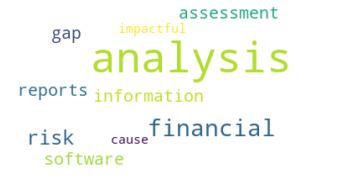

Cluster: 5


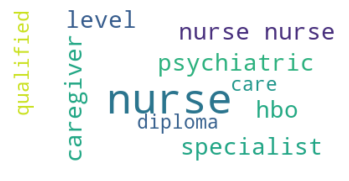

Cluster: 6


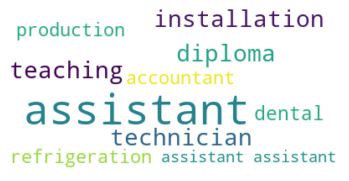

Cluster: 7


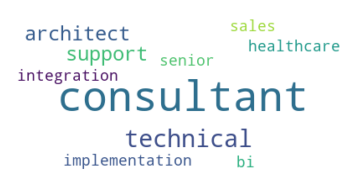

Cluster: 8


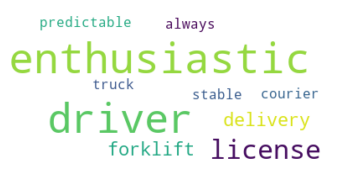

Cluster: 9


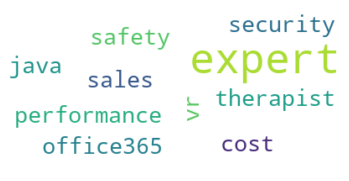

Cluster: 10


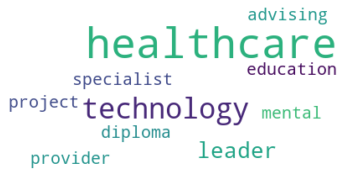

Cluster: 11


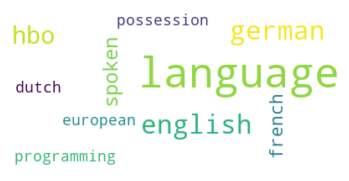

Cluster: 12


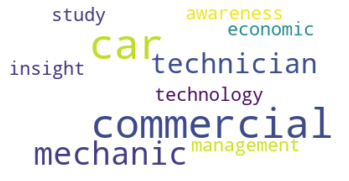

Cluster: 13


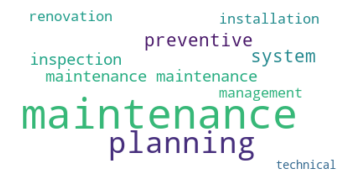

Cluster: 14


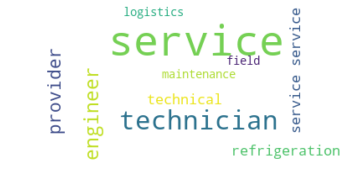

Cluster: 15


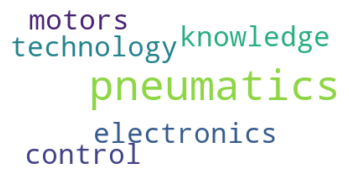

Cluster: 16


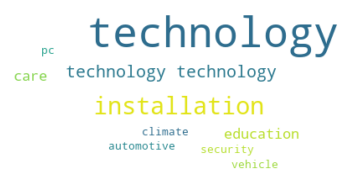

Cluster: 17


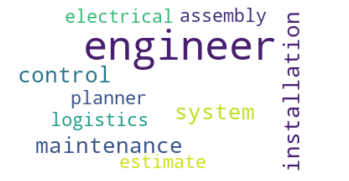

Cluster: 18


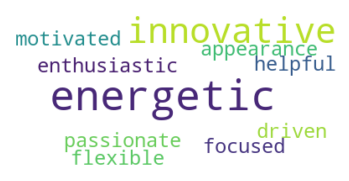

Cluster: 19


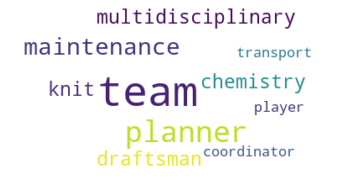

Cluster: 20


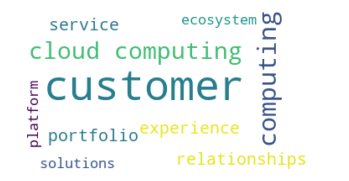

Cluster: 21


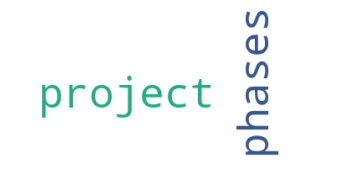

Cluster: 22


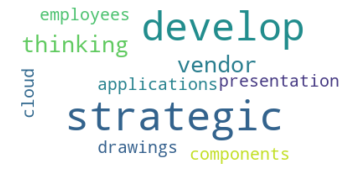

Cluster: 23


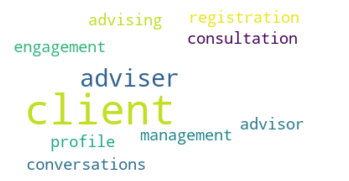

Cluster: 24


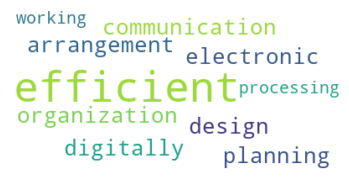

Cluster: 25


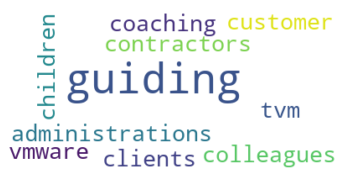

Cluster: 26


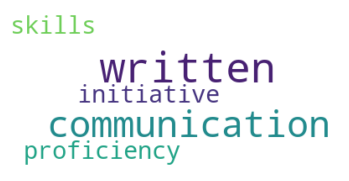

Cluster: 27


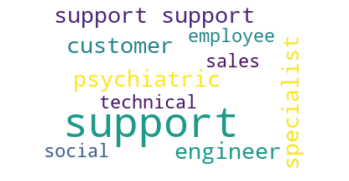

Cluster: 28


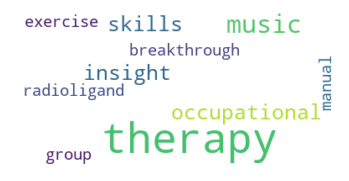

Cluster: 29


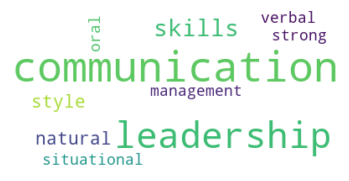

Cluster: 30


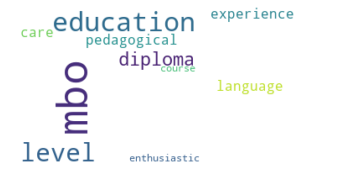

Cluster: 31


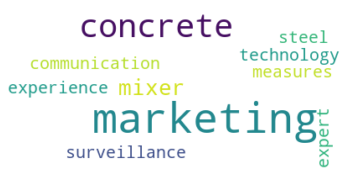

Cluster: 32


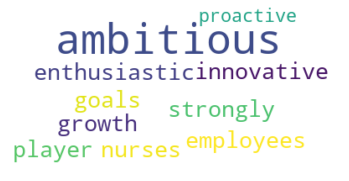

Cluster: 33


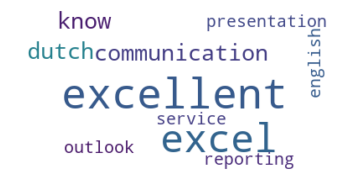

Cluster: 34


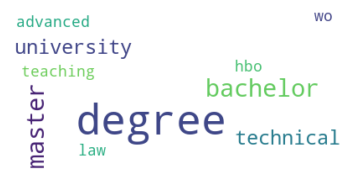

Cluster: 35


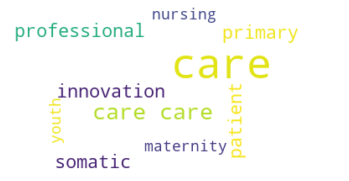

Cluster: 36


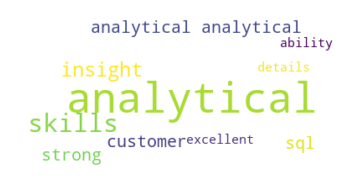

Cluster: 37


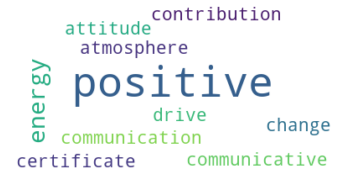

Cluster: 38


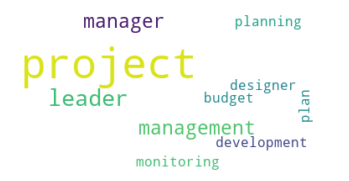

Cluster: 39


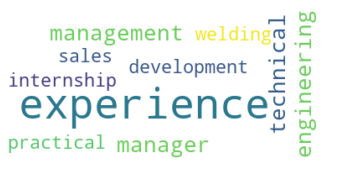

Cluster: 40


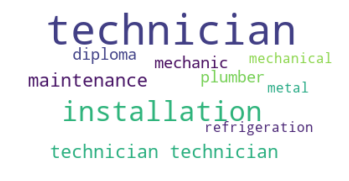

Cluster: 41


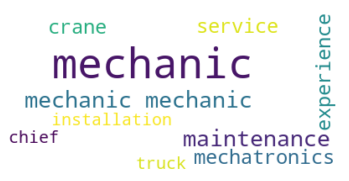

Cluster: 42


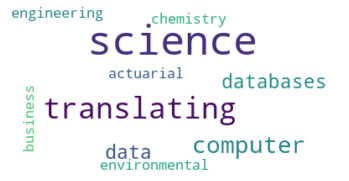

Cluster: 43


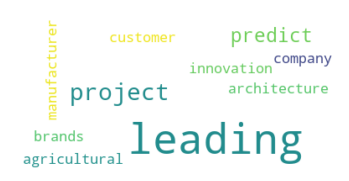

Cluster: 44


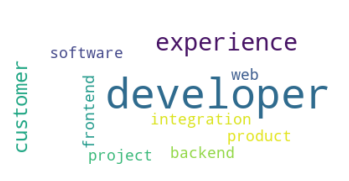

Cluster: 45


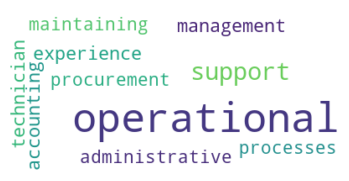

Cluster: 46


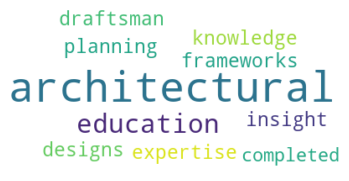

Cluster: 47


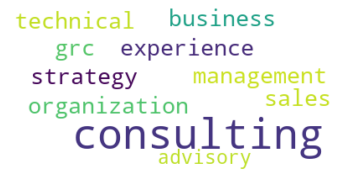

Cluster: 48


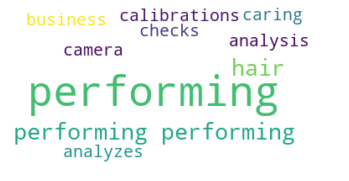

Cluster: 49


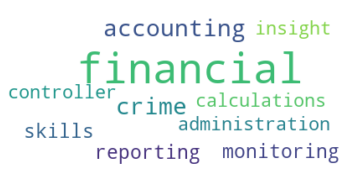

Cluster: 50


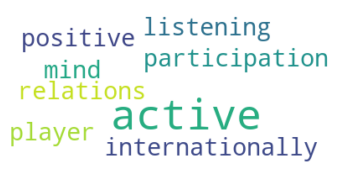

Cluster: 51


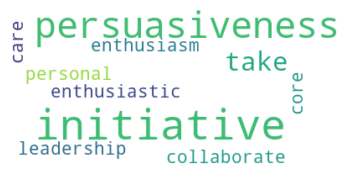

Cluster: 52


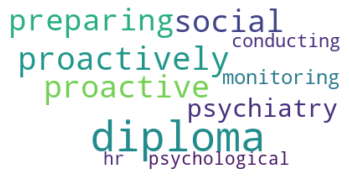

Cluster: 53


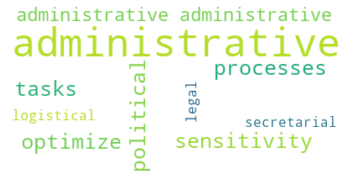

Cluster: 54


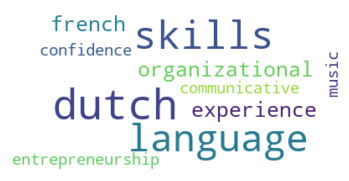

Cluster: 55


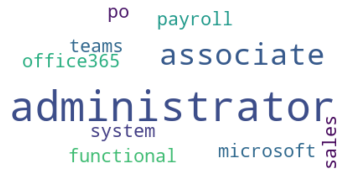

Cluster: 56


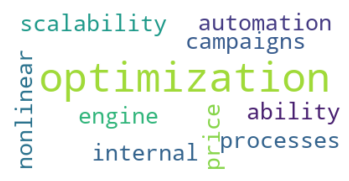

Cluster: 57


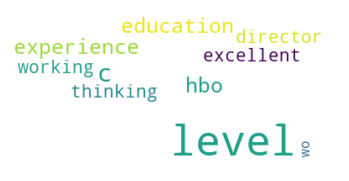

Cluster: 58


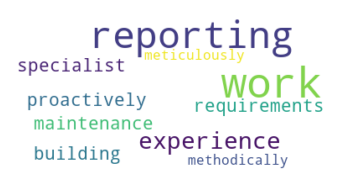

Cluster: 59


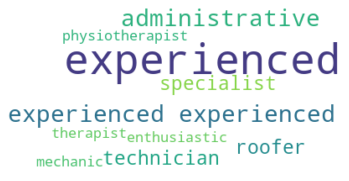

Cluster: 60


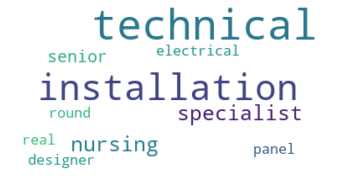

Cluster: 61


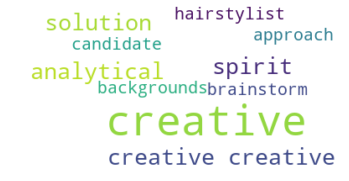

Cluster: 62


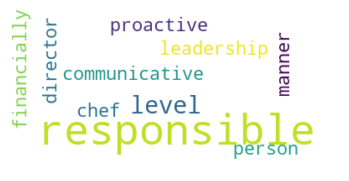

Cluster: 63


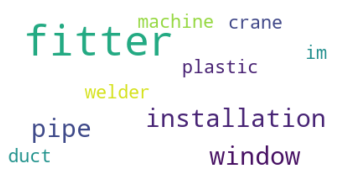

Cluster: 64


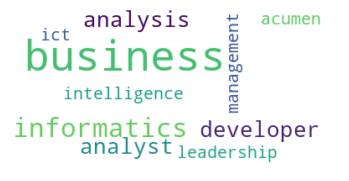

Cluster: 65


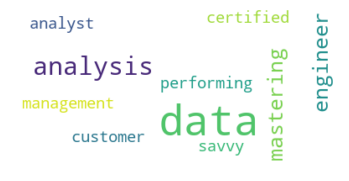

Cluster: 66


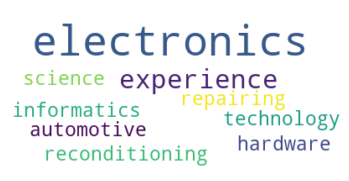

Cluster: 67


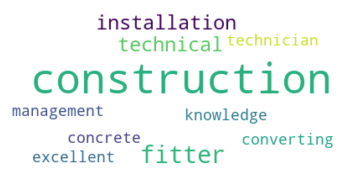

Cluster: 68


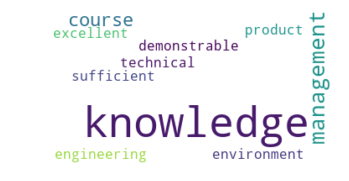

Cluster: 69


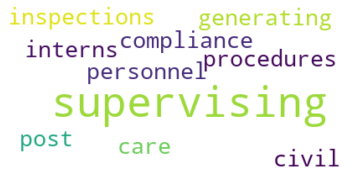

In [34]:
from wordcloud import WordCloud
result={'cluster':labels,'words':data}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['words'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    
   
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [31]:
x = result[result['cluster']==3]
x

,cluster,words
11,3,technical service
21,3,technical knowledge
22,3,technical management
25,3,technical insight
45,3,technical education
...,...,...
2803,3,senior technical advisor
2836,3,completed technical training
2839,3,any technical experience
2843,3,completed technical hbo


In [25]:
x = result[result['cluster']==6]
x

,cluster,words
9,6,mbo education
13,6,mbo level
16,6,hbo education
28,6,mbo diploma
39,6,university education
...,...,...
2796,6,c level contact
2851,6,vig level 3
2852,6,client education mbo
2854,6,hbo education current


In [27]:
x = result[result['cluster']==9]
x

,cluster,words
0,9,work experience
1,9,have experience
18,9,demonstrable experience
27,9,customer experience
67,9,practical experience
...,...,...
2833,9,hbo level experience
2838,9,chain monitoring experience
2839,9,any technical experience
2849,9,dutch language experience
